### IO Tables
Everything to do with input-output tables

In [39]:
# Imports (Run before running anything else)
import matplotlib.pyplot as plt
import country_converter as cc
import shipping_network as sn
import statsmodels.api as sm
import matplotlib as mpl
import geopandas as gpd
import io_tables as io
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=3)

#### Parameters

In [40]:
table_file = 'data/2016-2020_SML/2019_SML.csv'
n_country = 77
n_industry = 45
n_final_use = 6
n_value_added = 2

n_bins = 50
PAGE_WIDTH = 7.5

canal_name = 'suez'
orgin_node = 'maritime2927'
canal_file = 'data/Global port supply-chains/Maritime_transport/edges_suez_maritime.csv'

save = True
present = False

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

#### Estimate Effects

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper


count   68.000
mean     0.098
std      0.122
min      0.002
25%      0.053
50%      0.081
75%      0.110
max      0.812
Name: pct_v_blocked, dtype: float64

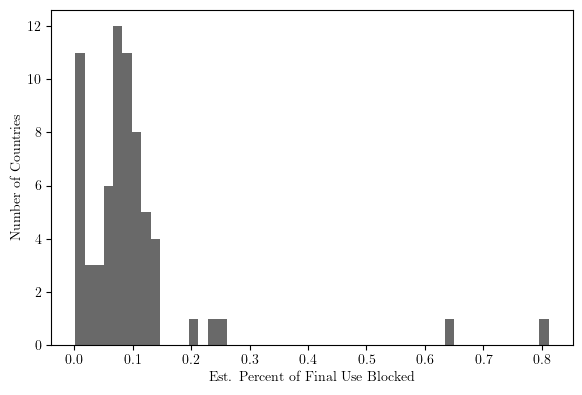

In [41]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)

## setup histogram
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH * 3/4)
fig.set_figheight(PAGE_WIDTH * 1/2)
ax.set_xlabel('Est. Percent of Final Use Blocked')
ax.set_ylabel('Number of Countries')

#plot it
ax.stairs(
        *np.histogram(country_stats['pct_v_blocked'].dropna(), n_bins),
        color='dimgray',
        fill=True
    )

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/pct_v_blocked_hist.pdf', bbox_inches='tight', pad_inches=0)
country_stats['pct_v_blocked'].dropna().describe()

#### Exposure by continent 

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
ROW not found in ISO3


pct_v_blocked                                          
                      count  mean   std   min   25%   50%   75%   max
continent                                                            
Africa                8.000 0.148 0.273 0.004 0.004 0.064 0.113 0.812
Asia                 22.000 0.106 0.059 0.044 0.069 0.091 0.117 0.257
Europe               27.000 0.112 0.107 0.059 0.076 0.087 0.107 0.635
North America         4.000 0.011 0.006 0.005 0.008 0.010 0.014 0.020
Oceania               2.000 0.042 0.031 0.020 0.031 0.042 0.053 0.064
South America         5.000 0.006 0.004 0.002 0.002 0.008 0.009 0.010

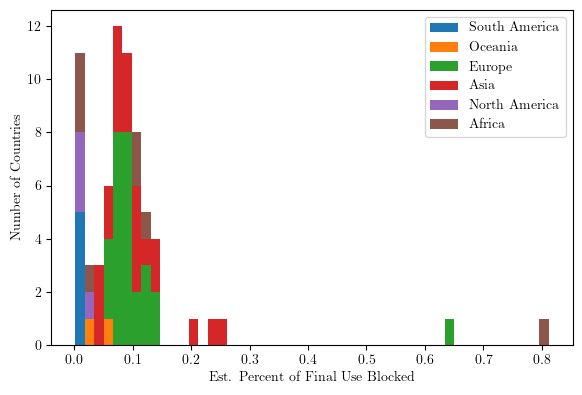

In [42]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)
country_stats['continent'] = cc.convert(country_stats.index, to='Continent_7')

## setup histogram
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH * 3/4)
fig.set_figheight(PAGE_WIDTH * 1/2)
ax.set_xlabel('Est. Percent of Final Use Blocked')
ax.set_ylabel('Number of Countries')

#plot it
hist, bins = np.histogram(country_stats['pct_v_blocked'].dropna(), n_bins)
hist = 0*hist
for i, c in enumerate(country_stats.dropna()['continent'].unique()):
    hist += np.histogram(country_stats[country_stats['continent'] == c]['pct_v_blocked'].dropna(), bins)[0]
    ax.stairs(
            hist,
            bins,
            fill=True,
            label=c,
            zorder=-i
        )

# final things
ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/pct_v_blocked_cont_hist.pdf', bbox_inches='tight', pad_inches=0)
country_stats.dropna()[['continent', 'pct_v_blocked']].groupby('continent').describe()

#### Exposure by distance 

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
ROW not found in ISO3
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ports['dist_from_' + canal_name][i] = distance # add results to dictionary
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_net

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_v_blocked   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     11.18
Date:                Fri, 03 May 2024   Prob (F-statistic):            0.00137
Time:                        11:18:50   Log-Likelihood:                 52.252
No. Observations:                  68   AIC:                            -100.5
Df Residuals:                      66   BIC:                            -96.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1802      0.028      6.414      0.000       0.124       0.236
dist_from_suez -9.718e-06   2.91e-06     -3.343      0.001   -1.55e-05   -3.91e-06
==============================================================================
Omnibus:                       93.911   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1343.248
Skew:                           4.271   Prob(JB):                    2.08e-292
Kurtosis:                      23.028   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

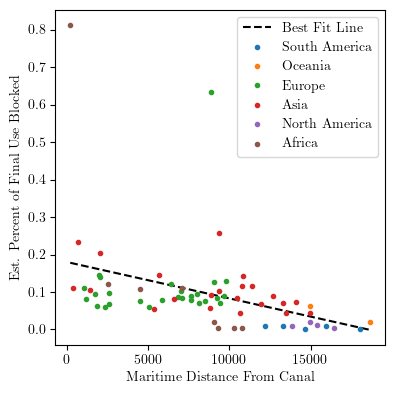

In [43]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)
country_stats['continent'] = cc.convert(country_stats.index, to='Continent_7')

# read files
edges = gpd.read_file('data/Global port supply-chains/Network/edges_maritime_corrected.gpkg')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')

# get routes
ports = sn.fastest_route_from(orgin_node, edges, ports, canal_name)

# port inflow scores
ports = ports.merge(
        right=shipping_network[['to_id', 'q_sea_flow', 'v_sea_flow']],
        left_on='id',
        right_on='to_id'
    )

# weighted average
wm = lambda x: np.average(x, weights=ports.loc[x.index, 'v_sea_flow'])

# merge
country_stats = country_stats.merge(
    right=ports[['iso3', 'q_sea_flow', 'v_sea_flow', 'dist_from_' + canal_name]].groupby('iso3').agg(
            q_sea_flow=('q_sea_flow', 'sum'),
            v_sea_flow=('v_sea_flow', 'sum'),
            temp=('dist_from_' + canal_name, wm)
        ).reset_index().rename(columns={
            'temp': 'dist_from_' + canal_name
        }),
    left_index=True,
    right_on='iso3'
)

# regression
res = sm.OLS(
        country_stats.dropna()['pct_v_blocked'],
        sm.add_constant(country_stats.dropna()['dist_from_' + canal_name])
    ).fit()

# setup plot
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH * 1/2)
fig.set_figheight(PAGE_WIDTH * 1/2)
ax.set_xlabel('Maritime Distance From Canal')
ax.set_ylabel('Est. Percent of Final Use Blocked')
ax.plot([min(country_stats['dist_from_' + canal_name]), max(country_stats['dist_from_' + canal_name])],
        [max(res.predict()), min(res.predict())],
        'k--',
        label='Best Fit Line')

# plot it
for c in country_stats.dropna()['continent'].unique():
    ax.plot(
            country_stats[country_stats['continent'] == c]['dist_from_' + canal_name],
            country_stats[country_stats['continent'] == c]['pct_v_blocked'],
            '.',
            label=c
        )

# final things
ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/dist_vs_pct_v_blocked.pdf', bbox_inches='tight', pad_inches=0)
res.summary()

#### Exposure by direct canal exposure

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
ROW not found in ISO3
/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_44561/72779223.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_v_blocked   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     10.63
Date:                Fri, 03 May 2024   Prob (F-statistic):            0.00176
Time:                        11:19:19   Log-Likelihood:                 52.013
No. Observations:                  68   AIC:                            -100.0
Df Residuals:                      66   BIC:                            -95.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0689      0.017      4.163      0.000       0.036       0.102
v_ratio_suez     0.3595      0.110      3.261      0.002       0.139       0.580
==============================================================================
Omnibus:                       92.693   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1293.069
Skew:                           4.196   Prob(JB):                    1.64e-281
Kurtosis:                      22.646   Cond. No.                         8.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

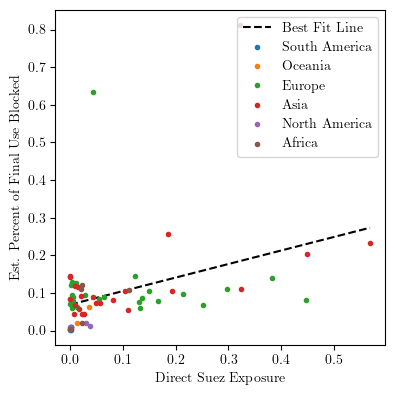

In [44]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)
country_stats['continent'] = cc.convert(country_stats.index, to='Continent_7')

# get file
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')
shipping_through_canal = sn.geodataframe_from_csv(canal_file)
earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# canal scores
shipping_network = sn.canal_reliance(shipping_network, shipping_through_canal, canal_name)

# port inflow scores
ports = ports.merge(
        right=shipping_network[['to_id', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name, 'q_ratio_' + canal_name, 'v_ratio_' + canal_name]],
        left_on='id',
        right_on='to_id'
    )

# merge data for eacg country
country_stats = country_stats.merge(
        right=ports[['iso3', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name]].groupby('iso3').sum().reset_index(),
        left_index=True,
        right_on='iso3',
        how='left'
    )
country_stats['q_ratio_' + canal_name] = country_stats['q_sea_flow_' + canal_name] / country_stats['q_sea_flow']
country_stats['v_ratio_' + canal_name] = country_stats['v_sea_flow_' + canal_name] / country_stats['v_sea_flow']

# regression
res = sm.OLS(
        country_stats.dropna()['pct_v_blocked'],
        sm.add_constant(country_stats.dropna()['v_ratio_' + canal_name])
    ).fit()

# setup plot
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH * 1/2)
fig.set_figheight(PAGE_WIDTH * 1/2)
ax.set_xlabel('Direct ' + canal_name.title() + ' Exposure')
ax.set_ylabel('Est. Percent of Final Use Blocked')
ax.plot([min(country_stats['v_ratio_' + canal_name]), max(country_stats['v_ratio_' + canal_name])],
        [min(res.predict()), max(res.predict())],
        'k--',
        label='Best Fit Line')

# plot it
for c in country_stats.dropna()['continent'].unique():
    ax.plot(
            country_stats[country_stats['continent'] == c]['v_ratio_' + canal_name],
            country_stats[country_stats['continent'] == c]['pct_v_blocked'],
            '.',
            label=c
        )

# final things
ax.legend()
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/exposure_vs_pct_v_blocked.pdf', bbox_inches='tight', pad_inches=0)
res.summary()

#### Percent Exposure on a map

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
ROW not found in ISO3
/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_44561/1651135962.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,v_total,v_through_suez,pct_v_through_suez,v_blocked,pct_v_blocked,continent_y
172,6944975.000,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN
173,622137.000,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN
174,1794248.000,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.000,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN
176,11062113.000,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN


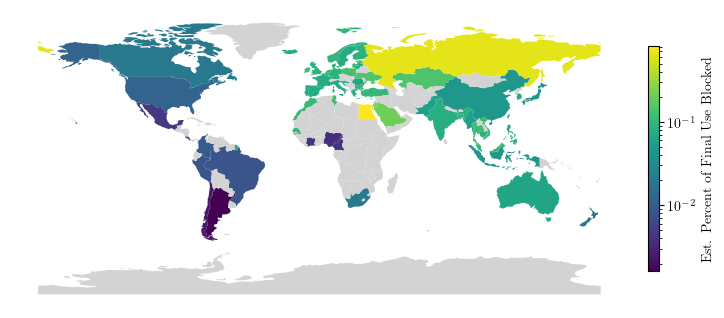

In [45]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)
country_stats['continent'] = cc.convert(country_stats.index, to='continent')

# read file
earth = earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# merge
earth = earth.merge(
        right=country_stats,
        left_on='iso_a3',
        right_index=True,
        how='left'
    )

# plot attributes
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH * 0.4)
ax.axis('off')

# plot
earth.plot(
        column='pct_v_blocked',
        missing_kwds={'color': 'lightgrey'},
        cmap='viridis',
        legend=True,
        legend_kwds={
            'label': 'Est. Percent of Final Use Blocked',
            'pad': 0.025,
            'shrink': 0.75,
        },
        norm=mpl.colors.LogNorm(vmin=earth['pct_v_blocked'].min(), vmax=earth['pct_v_blocked'].max()), # logscale it
        ax=ax
    )

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/pct_v_blocked_map.pdf', bbox_inches='tight', pad_inches=0)
earth.tail()

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...

,v_total_16,v_through_suez_16,pct_v_through_suez_16,v_blocked16,pct_v_blocked_16,v_total_17,v_through_suez_17,pct_v_through_suez_17,v_blocked17,pct_v_blocked_17,...,v_total_19,v_through_suez_19,pct_v_through_suez_19,v_blocked19,pct_v_blocked_19,v_total_20,v_through_suez_20,pct_v_through_suez_20,v_blocked20,pct_v_blocked_20
ARG,476480.023,414.632,0.087,6.816,0.001,559127.850,353.678,0.063,5.814,0.001,...,365441.836,361.184,0.099,5.937,0.002,311500.168,235.716,0.076,3.875,0.001
AUS,1187751.531,45785.854,3.855,752.644,0.063,1274727.718,49750.995,3.903,817.825,0.064,...,1229492.187,47567.155,3.869,781.926,0.064,1247473.302,41989.360,3.366,690.236,0.055
AUT,340035.942,NaN,NaN,NaN,NaN,360934.277,NaN,NaN,NaN,NaN,...,385106.645,NaN,NaN,NaN,NaN,378699.191,NaN,NaN,NaN,NaN
BEL,421306.938,21227.301,5.038,348.942,0.083,449436.449,22527.720,5.012,370.319,0.082,...,482108.188,24652.329,5.113,405.244,0.084,469885.565,23384.062,4.977,384.396,0.082
BGD,236799.970,14396.759,6.080,236.659,0.100,268235.954,17487.890,6.520,287.472,0.107,...,322079.714,17893.476,5.556,294.139,0.091,335276.447,17799.265,5.309,292.591,0.087


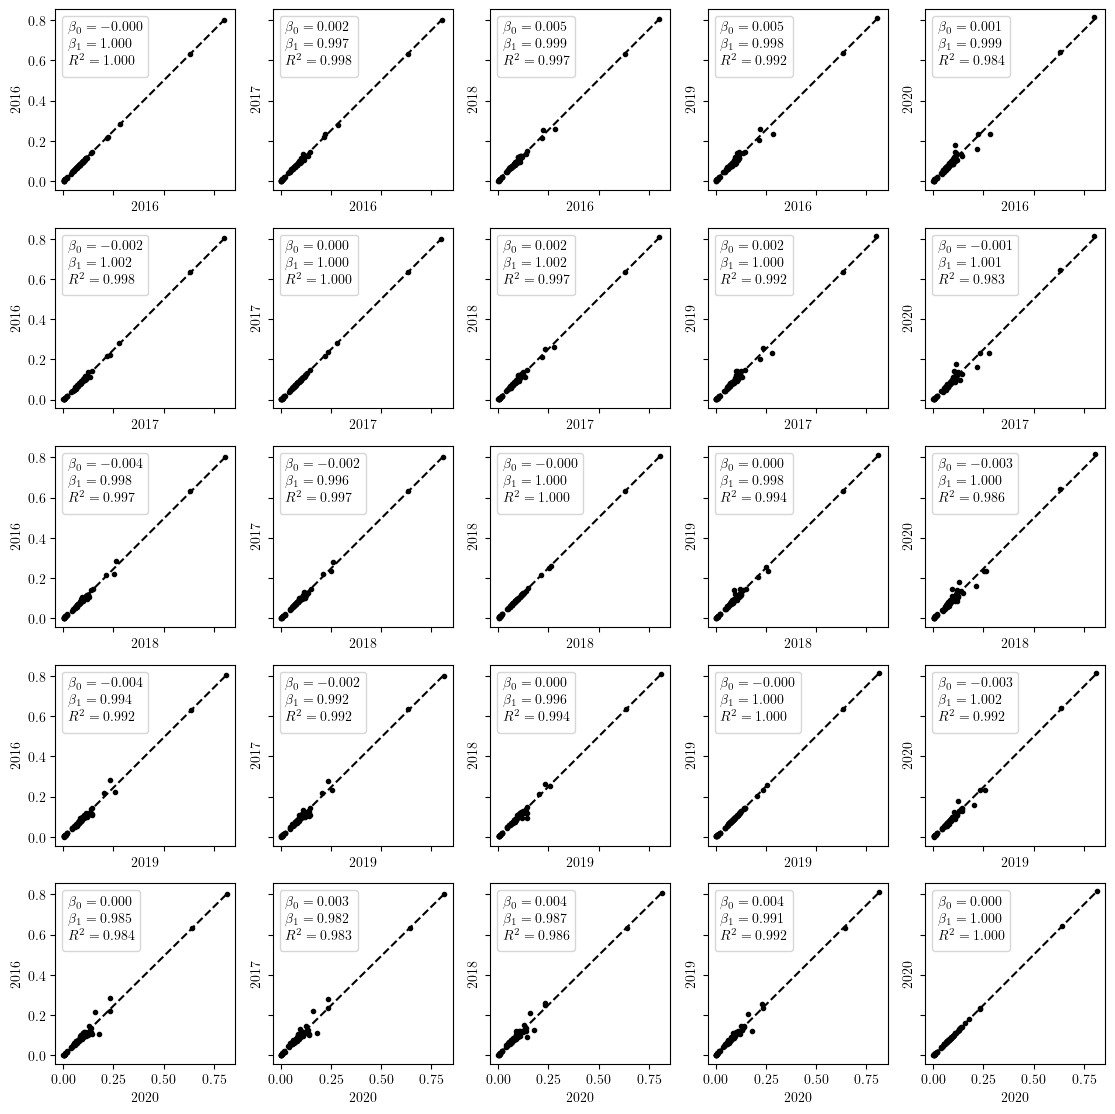

In [51]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)

def year_country_stats(file, yearstr):
    io_table = io.get_io_table(file, n_country, n_industry)
    Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
    io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)
    value_adj = io.get_value_chain_adj(F, A, V, L_inv)
    country_stats = io.get_country_stats(value_adj, suez_reliance)
    return country_stats.rename(
            columns={
                    'v_total': 'v_total_' + yearstr,
                    'v_through_suez': 'v_through_suez_' + yearstr,
                    'pct_v_through_suez': 'pct_v_through_suez_' + yearstr,
                    'v_blocked': 'v_blocked' + yearstr,
                    'pct_v_blocked': 'pct_v_blocked_' + yearstr
                }
        )

country_stats = year_country_stats('data/2016-2020_SML/2016_SML.csv', '16').merge(
        right=year_country_stats('data/2016-2020_SML/2017_SML.csv', '17'),
        left_index=True,
        right_index=True
    ).merge(
        right=year_country_stats('data/2016-2020_SML/2018_SML.csv', '18'),
        left_index=True,
        right_index=True
    ).merge(
        right=year_country_stats('data/2016-2020_SML/2019_SML.csv', '19'),
        left_index=True,
        right_index=True
    ).merge(
        right=year_country_stats('data/2016-2020_SML/2020_SML.csv', '20'),
        left_index=True,
        right_index=True
    )

# util
yearstrs = ['16', '17', '18', '19', '20']

# setup plots
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True)
fig.set_figwidth(PAGE_WIDTH*1.5)
fig.set_figheight(PAGE_WIDTH*1.5)

for i, ystr1 in enumerate(yearstrs):
    for j, ystr2 in enumerate(yearstrs):
        ax[i, j].set_xlabel('20'+ystr1)
        ax[i, j].set_ylabel('20'+ystr2)
        res = sm.OLS(
                country_stats['pct_v_blocked_' + ystr2].dropna(),
                sm.add_constant(country_stats['pct_v_blocked_' + ystr1].dropna())
            ).fit()
        ax[i, j].plot(
                [min(country_stats['pct_v_blocked_' + ystr1]), max(country_stats['pct_v_blocked_' + ystr1])],
                [min(res.predict()), max(res.predict())],
                'k--'
            )
        ax[i, j].plot(
                country_stats['pct_v_blocked_' + ystr1],
                country_stats['pct_v_blocked_' + ystr2],
                'k.'
            )
        ax[i, j].legend(title=r'\noindent$\beta_0 = %0.3f$\\$\beta_1 = %0.3f$\\$R^2 = %0.3f$' % (res.params['const'], res.params['pct_v_blocked_' + ystr1], res.rsquared))

# final things
fig.tight_layout()
if save: fig.savefig(f'../{save_folder}/graphs/pct_v_blocked_years.pdf')
country_stats.head()

#### Include the Rest of the World

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      pct_v_blocked_row   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     3357.
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.54e-58
Time:                        11:21:13   Log-Likelihood:                 178.93
No. Observations:                  68   AIC:                            -353.9
Df Residuals:                      66   BIC:                            -349.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0327      0.003     11.850      0.000       0.027       0.038
pct_v_blocked_no_row     1.0238      0.018     57.940      0.000       0.988       1.059
==============================================================================
Omnibus:                        8.303   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.588
Skew:                           0.870   Prob(JB):                       0.0137
Kurtosis:                       2.989   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

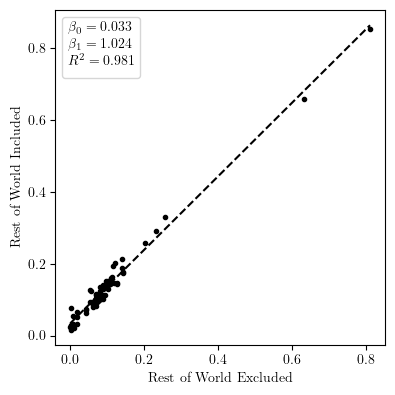

In [47]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance).rename(
        columns={
                'v_total': 'v_total_no_row',
                'v_through_suez': 'v_through_suez_no_row',
                'pct_v_through_suez': 'pct_v_through_suez_no_row',
                'v_blocked': 'v_blocked_no_row',
                'pct_v_blocked': 'pct_v_blocked_no_row'
            }
    )

# set ROW to 1
suez_reliance.loc['ROW', :] = suez_reliance['ARG'].isna().replace({False: 1, True: np.nan})
suez_reliance.loc[:, 'ROW'] = suez_reliance['ARG'].isna().replace({False: 1, True: np.nan})
country_stats = country_stats.merge(
        right=io.get_country_stats(value_adj, suez_reliance).rename(
                columns={
                        'v_total': 'v_total_row',
                        'v_through_suez': 'v_through_suez_row',
                        'pct_v_through_suez': 'pct_v_through_suez_row',
                        'v_blocked': 'v_blocked_row',
                        'pct_v_blocked': 'pct_v_blocked_row'
                    }
            ),
        left_index=True,
        right_index=True
    )

# regression
res = sm.OLS(
        country_stats.dropna()['pct_v_blocked_row'],
        sm.add_constant(country_stats.dropna()['pct_v_blocked_no_row'])
    ).fit()

# setup plot
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH * 1/2)
fig.set_figheight(PAGE_WIDTH * 1/2)
ax.set_xlabel('Rest of World Excluded')
ax.set_ylabel('Rest of World Included')
ax.plot([min(country_stats['pct_v_blocked_no_row']), max(country_stats['pct_v_blocked_no_row'])],
        [min(res.predict()), max(res.predict())],
        'k--')

# plot it
ax.plot(
        country_stats['pct_v_blocked_no_row'],
        country_stats['pct_v_blocked_row'],
        'k.'
    )

# final things
ax.legend(title=r'\noindent$\beta_0 = %0.3f$\\$\beta_1 = %0.3f$\\$R^2 = %0.3f$' % (res.params['const'], res.params['pct_v_blocked_no_row'], res.rsquared))
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/graphs/row_vs_no_row.pdf', bbox_inches='tight', pad_inches=0)
res.summary()

#### Total Effect

In [48]:
# get the matricies
io_table = io.get_io_table(table_file, n_country, n_industry)
Z, F, W, X, A, V, L_inv = io.get_matricies(io_table, n_country, n_industry, n_final_use, n_value_added)
io.check_matricies(Z, F, W, X, A, V, L_inv, 10e-1)

# value chain adjacency (all countries)
value_adj = io.get_value_chain_adj(F, A, V, L_inv)
suez_reliance = io.get_node_reliance(value_adj)
pct_thru_canal = 100 * suez_reliance / value_adj
pct_blocked = pct_thru_canal * 6/365

# stats
country_stats = io.get_country_stats(value_adj, suez_reliance)

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/io_tables.py:60: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return (np.diag((V @ np.ones(V.shape[1]))) @ L_inv @ F).set_axis(A.index).groupby(level=0).sum().groupby(level=0, axis=1).sum() # los paper


In [49]:
country_stats.sum()

v_total              81589601.156
v_through_suez        2885774.503
pct_v_through_suez        407.035
v_blocked               47437.389
pct_v_blocked               6.691
dtype: float64